In [1]:
import geopandas as gpd
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import altair as alt
from mpl_toolkits.mplot3d import Axes3D
alt.data_transformers.enable("vegafusion")
import seaborn as sns
import sys

In [2]:
sys.path.append("../../src")
import main

In [3]:
cd ..

/Users/lisawink/Documents/freiburg/notebooks


In [4]:
params = ['BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean','BuERI_mode', 'StrClo400_median']

In [5]:
radius = 50

In [47]:
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

In [32]:
# apply mapping of variable names to figure labels
var_name_mapping = {
    'BuAre_sum': '$\it{A_B}$ (m$^2$)',
    'BuVol_3D_sum': '$\it{V_B}$ (m$^3$)',
    'BuEWA_3D_sum': '$\it{A_F}$ (m$^2$)',
    'BuIBD': '$\it{IBD}$ (m)', 
    'BuAdj': '$\it{Adj}$',
    'BuSWR_3D_median': '$\it{SWR}$',
    'BuHt_wmean': '$\it{H_B^A}$ (m)',
    'StrHW_median': '$\it{H/W}$',
    'SVF_3D_mean': '$\it{SVF}$',
    'BuERI_mode': '$\it{ERI}$',
    'StrClo400_median': '$\it{C}$'}

<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:4: SyntaxWarning: invalid escape sequence '\i'
<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\i'
<>:7: SyntaxWarning: invalid escape sequence '\i'
<>:8: SyntaxWarning: invalid escape sequence '\i'
<>:9: SyntaxWarning: invalid escape sequence '\i'
<>:10: SyntaxWarning: invalid escape sequence '\i'
<>:11: SyntaxWarning: invalid escape sequence '\i'
<>:12: SyntaxWarning: invalid escape sequence '\i'
<>:13: SyntaxWarning: invalid escape sequence '\i'
<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:4: SyntaxWarning: invalid escape sequence '\i'
<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\i'
<>:7: SyntaxWarning: invalid escape sequence '\i'
<>:8: SyntaxWarning: invalid escape sequence '\i'
<>:9: SyntaxWarning: invalid escape sequence '\i'
<>:10: SyntaxWarning: invalid escape sequence '\i'
<>:11: SyntaxWarning: invalid escape sequence

In [37]:
def corr_matrix(params, radius):

    vars = gpd.read_parquet(f'../../data/processed_data/processed_station_params_{radius}.parquet')
    vars.index = vars['station_id']
    to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF_3D']
    vars = vars.drop(to_remove, axis=1)

    scaler = StandardScaler()
    vars_scaled = scaler.fit_transform(vars)
    vars = pd.DataFrame(vars_scaled, columns=vars.columns, index=vars.index)

    # make column negative
    #vars['BuERI_mode'] = -vars['BuERI_mode']
    #vars['SVF_3D_mean'] = -vars['SVF_3D_mean']
    #vars['BuIBD'] = -vars['BuIBD']
    vars['BuAdj'] = -vars['BuAdj']

    # cross correlation matrix of parameters
    corr_s = vars[params].corr(method='spearman')

    # color bar keyword arguments
    cbar_kws = {"shrink":1,
                'extend':'min', 
                'extendfrac':.1,  
                'ticks': [-0, 0.2, 0.4, 0.6, 0.8, 1.0], # set ticks of color bar
                'label': 'Spearman Correlation'}

    g = sns.clustermap(corr_s, method='ward', metric='euclidean', cmap='RdBu', figsize=(10,10), linewidths=.25, vmin=-1, vmax=1, cbar=False)
    g.ax_row_dendrogram.remove()
    new_labels_y = [var_name_mapping[label.get_text()] for label in g.ax_heatmap.get_yticklabels()]
    g.ax_heatmap.set_yticklabels(new_labels_y)
    new_labels_x = [var_name_mapping[label.get_text()] for label in g.ax_heatmap.get_xticklabels()]
    g.ax_heatmap.set_xticklabels(new_labels_x)

    g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=12)
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=12)

    #plt.suptitle('Clustermap of Spearman Correlation for Radius '+str(radius), fontsize=16, color='black', )
    #plt.text(0.5, 3.5,str(radius)+ 'm Radius', size=14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.savefig('../../figures/fig5/clustermap_spearman_'+str(radius)+'.svg', dpi=300)
    plt.savefig('../../figures/fig5/clustermap_spearman_'+str(radius)+'.png',bbox_inches='tight')

    #ax=vars[params].plot(figsize=(20,10))
    #ax.set_xticks(range(len(vars[params])))  # This works if the index is numerical
    #ax.set_xticklabels(vars[params].index, rotation=45, ha='right')  # Ensure correct labels are used

/Users/lisawink/.conda/envs/py312_paper1/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_paper1/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_paper1/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


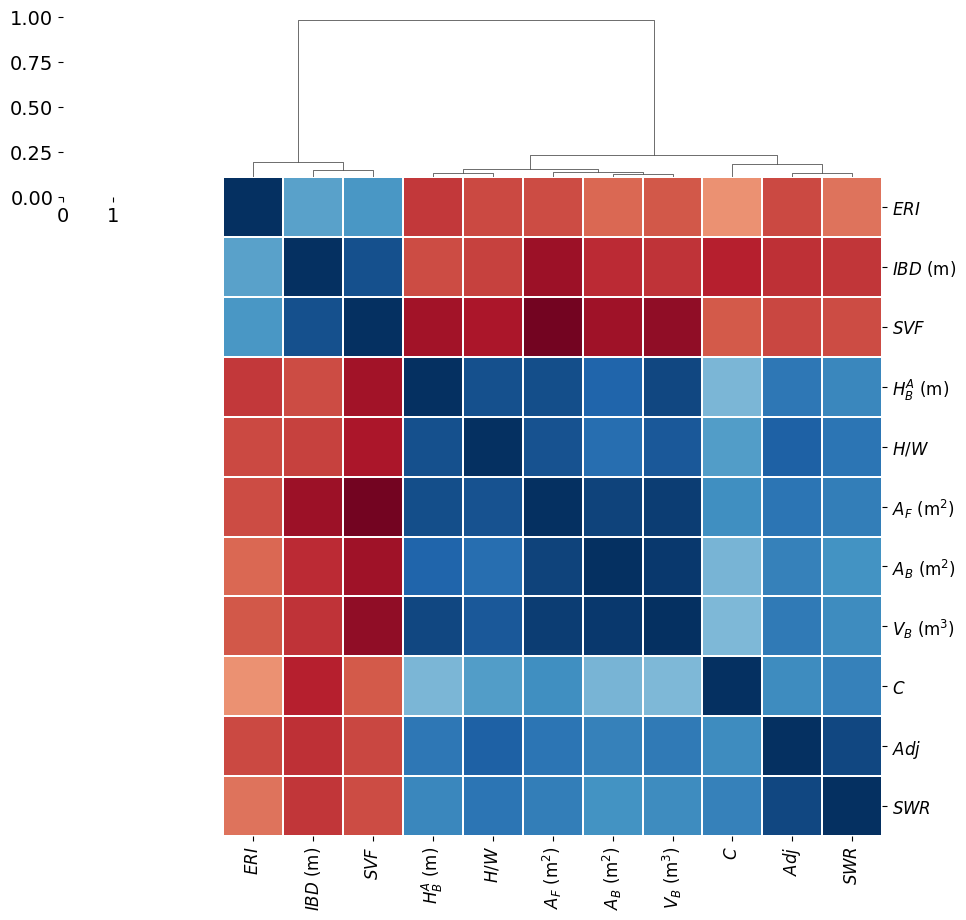

In [38]:
corr_matrix(params, 300)

In [39]:
params = ['BuHt_wmean','StrHW_median', 'BuEWA_3D_sum', 'SVF_3D_mean', 'BuAre_sum', 'BuVol_3D_sum','BuERI_mode', 'StrClo400_median','BuIBD','BuAdj','BuSWR_3D_median']

In [46]:
params = ['BuERI_mode','BuIBD','SVF_3D_mean','BuHt_wmean','StrHW_median','BuEWA_3D_sum','BuAre_sum', 'BuVol_3D_sum',  'StrClo400_median',  'BuAdj', 'BuSWR_3D_median']

In [47]:
def corr_matrix_order(params, radius):

    vars = gpd.read_parquet(f'../../data/processed_data/processed_station_params_{radius}.parquet')
    vars.index = vars['station_id']
    to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF_3D']
    vars = vars.drop(to_remove, axis=1)

    scaler = StandardScaler()
    vars_scaled = scaler.fit_transform(vars)
    vars = pd.DataFrame(vars_scaled, columns=vars.columns, index=vars.index)

    # make column negative
    #vars['BuERI_mode'] = -vars['BuERI_mode']
    #vars['SVF_3D_mean'] = -vars['SVF_3D_mean']
    #vars['BuIBD'] = -vars['BuIBD']
    vars['BuAdj'] = -vars['BuAdj']

    # cross correlation matrix of parameters
    corr_s = vars[params].corr(method='spearman')

    plt.figure(figsize=(10,8))
    g = sns.heatmap(corr_s, cmap='RdBu',linewidths=.25, vmin=-1, vmax=1)

    # cross correlation matrix of parameters
    corr_s = vars[params].corr(method='spearman')

    # color bar keyword arguments
    cbar_kws = {"shrink":1,
                'extend':'min', 
                'extendfrac':.1,  
                'ticks': [-0, 0.2, 0.4, 0.6, 0.8, 1.0], # set ticks of color bar
                'label': 'Spearman Correlation'}

    #g = sns.clustermap(corr_s, method='ward', metric='euclidean', cmap='RdBu', figsize=(10,10), linewidths=.25, vmin=-1, vmax=1, cbar=False)

    new_labels_y = [var_name_mapping[label.get_text()] for label in g.get_yticklabels()]
    g.set_yticklabels(new_labels_y)
    new_labels_x = [var_name_mapping[label.get_text()] for label in g.get_xticklabels()]
    g.set_xticklabels(new_labels_x)

    g.set_xticklabels(g.get_xticklabels(), fontsize=12)
    g.set_yticklabels(g.get_yticklabels(), fontsize=12)

    #plt.suptitle('Clustermap of Spearman Correlation for Radius '+str(radius), fontsize=16, color='black', )
    #plt.text(0.5, 3.5,str(radius)+ 'm Radius', size=14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    #ax=vars[params].plot(figsize=(20,10))
    #ax.set_xticks(range(len(vars[params])))  # This works if the index is numerical
    #ax.set_xticklabels(vars[params].index, rotation=45, ha='right')  # Ensure correct labels are used

    #plt.suptitle('Clustermap of Spearman Correlation for Radius '+str(radius), fontsize=16, color='black', )
    #ax.text(0.5, 3.5,str(radius)+ 'm Radius', size=14)
    plt.savefig('../../figures/fig5/heatmap_spearman_'+str(radius)+'.svg', dpi=300)


/Users/lisawink/.conda/envs/py312_paper1/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_paper1/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_paper1/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


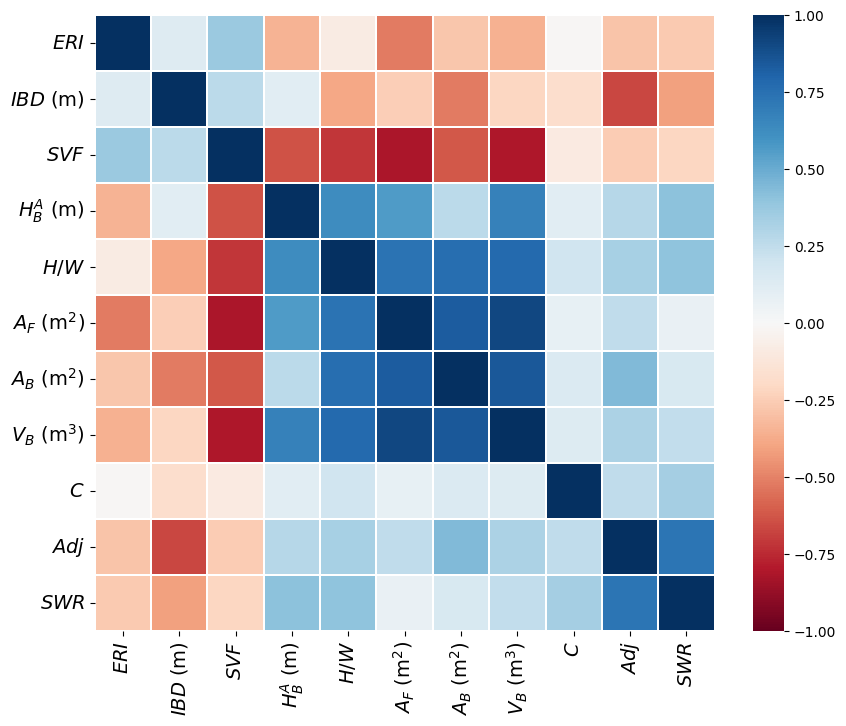

In [48]:
corr_matrix_order(params, 50)